Practice code MLFLOW, Dagshub, fastapi, docker

MLFLOW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='gender'>

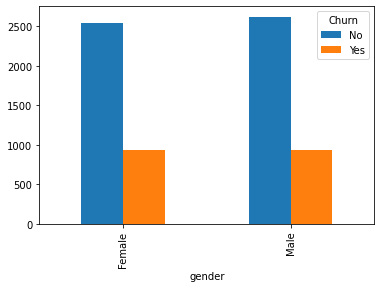

In [5]:
pd.crosstab(df.gender,df.Churn).plot(kind="bar")

In [6]:
df.groupby("Churn").mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [7]:
df.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [11]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce')

In [14]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.shape

(7043, 21)

In [17]:
df= df[df.TotalCharges!=" "]

In [18]:
df.shape

(7032, 21)

In [19]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
df.drop("customerID",axis="columns", inplace=True)

In [22]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df.gender.dtypes

dtype('O')

In [24]:
def print_col_unique_value(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col}: {df[col].unique()}")

In [25]:
print_col_unique_value(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
df.replace({'No internet service': 'No','No phone service':'No'},inplace=True)

In [27]:
print_col_unique_value(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
df.replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
df.replace({'Female': 1,'Male': 0},inplace=True)

In [30]:
for col in df:
    print(f"{col}:{df[col].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [31]:
df_new= pd.get_dummies(data=df, columns=["InternetService","Contract","PaymentMethod"]) #drop_first=True

In [32]:
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [34]:
df_new.drop(["InternetService_0","Contract_Month-to-month","PaymentMethod_Bank transfer (automatic)"],axis="columns",inplace=True)

In [35]:
df_new.shape

(7032, 24)

In [36]:
x = df_new.drop("Churn",axis="columns")
y = df_new.Churn 

STEPS:
1. train test split(with stratify=y)
2. scale : x_train n x_test
3. apply smote on scaled_x_train and y_train

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, stratify=y ,random_state=42)

In [39]:
#always split the data before scaling
#when preprocessing is done before splitting the data, data leakage is caused
#and best practise is to only sccale numeric columns

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler= MinMaxScaler()

In [42]:
columns_num= ['tenure','MonthlyCharges','TotalCharges']
x_train[columns_num].head()

,tenure,MonthlyCharges,TotalCharges
1413,65,94.55,6078.75
7003,26,35.75,1022.50
3355,68,90.20,6297.65
4494,3,84.30,235.05
3541,49,40.65,2070.75


In [43]:
columns_num= ['tenure','MonthlyCharges','TotalCharges']
x_train[columns_num]= scaler.fit_transform(x_train[columns_num])
x_test[columns_num]=scaler.transform(x_test[columns_num])

In [44]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,0,1,1,0.901408,1,1,1,1,1,...,0,0.759601,0.699279,0,1,0,1,1,0,0
7003,0,0,0,0,0.352113,0,0,0,0,1,...,0,0.173067,0.115820,1,0,0,0,0,1,0
3355,1,0,1,0,0.943662,1,1,0,1,1,...,0,0.716209,0.724538,0,1,0,1,1,0,0
4494,0,0,0,0,0.028169,1,0,0,1,0,...,0,0.657357,0.024954,0,1,0,0,0,1,0
3541,1,0,1,0,0.676056,0,0,1,0,0,...,0,0.221945,0.236782,1,0,0,0,0,0,0


In [45]:
y_train.value_counts() #imbalanced dataset

0    4130
1    1495
Name: Churn, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote= SMOTE(sampling_strategy='minority')

In [48]:
x_train_sm,y_train_sm= smote.fit_resample(x_train,y_train)

c:\users\mdeva\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [49]:
x_train_sm.shape, y_train_sm.shape

((8260, 23), (8260,))

### MLFLOW

In [50]:
reports=[]

In [51]:
from sklearn.metrics import classification_report

LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model_log= LogisticRegression(C=1, solver="liblinear")

In [54]:
model_log.fit(x_train_sm,y_train_sm)

LogisticRegression(C=1, solver='liblinear')

In [55]:
log_pred= model_log.predict(x_test)

In [56]:
report_log= classification_report(y_test,log_pred, output_dict=True)

In [57]:
reports.append(report_log)

In [58]:
reports[0]

{'0': {'precision': 0.8903150525087514,
  'recall': 0.7386253630203291,
  'f1-score': 0.8074074074074075,
  'support': 1033.0},
 '1': {'precision': 0.509090909090909,
  'recall': 0.7486631016042781,
  'f1-score': 0.6060606060606061,
  'support': 374.0},
 'accuracy': 0.7412935323383084,
 'macro avg': {'precision': 0.6997029807998303,
  'recall': 0.7436442323123036,
  'f1-score': 0.7067340067340068,
  'support': 1407.0},
 'weighted avg': {'precision': 0.7889804187928503,
  'recall': 0.7412935323383084,
  'f1-score': 0.7538866513990892,
  'support': 1407.0}}

RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model_rf= RandomForestClassifier(n_estimators=50, max_depth=5)

In [61]:
model_rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [62]:
rf_pred= model_rf.predict(x_test)

In [63]:
report_rf= classification_report(y_test,rf_pred, output_dict=True)

In [64]:
reports.append(report_rf)

In [66]:
reports[1]

{'0': {'precision': 0.9054054054054054,
  'recall': 0.7134559535333979,
  'f1-score': 0.7980508933405522,
  'support': 1033.0},
 '1': {'precision': 0.5008431703204047,
  'recall': 0.7941176470588235,
  'f1-score': 0.6142709410548087,
  'support': 374.0},
 'accuracy': 0.7348969438521677,
 'macro avg': {'precision': 0.703124287862905,
  'recall': 0.7537868002961107,
  'f1-score': 0.7061609171976805,
  'support': 1407.0},
 'weighted avg': {'precision': 0.7978671851340549,
  'recall': 0.7348969438521677,
  'f1-score': 0.7491996480279238,
  'support': 1407.0}}

X-G BOOST

In [67]:
from xgboost import XGBClassifier

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

if not using SMOTE

scale_pos_weight= 4130/1495

very important to tell xgboost that it was an imbalanced dataset, and tell scale_pos_weight the negetive_class_count/positive_class_count

but give these value before applying smote

In [69]:
model_xg= XGBClassifier(n_estimators=300, max_depth=4, eval_metric='logloss', learning_rate=0.05,subsample=0.8,colsample_bytree=0.8)

In [70]:
model_xg.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

for churn threshold 0.5 ins't right so use y_proba

In [71]:
xg_proba = model_xg.predict_proba(x_test)[:,1]
xg_pred= (xg_proba>0.35).astype(int)

In [72]:
report_xg= classification_report(y_test,xg_pred, output_dict=True)

In [73]:
reports.append(report_xg)

In [74]:
reports[2]

{'0': {'precision': 0.9088471849865952,
  'recall': 0.6563407550822846,
  'f1-score': 0.7622259696458684,
  'support': 1033.0},
 '1': {'precision': 0.4629349470499244,
  'recall': 0.8181818181818182,
  'f1-score': 0.591304347826087,
  'support': 374.0},
 'accuracy': 0.6993603411513859,
 'macro avg': {'precision': 0.6858910660182598,
  'recall': 0.7372612866320514,
  'f1-score': 0.6767651587359778,
  'support': 1407.0},
 'weighted avg': {'precision': 0.7903175638150849,
  'recall': 0.6993603411513859,
  'f1-score': 0.7167926458643488,
  'support': 1407.0}}

In [75]:
#del reports[2:]

ANN

In [76]:
models=[
    (
        "Logistic Regression",
        model_log,
        {'C':1, 'solver':"liblinear"},         
    ),
    (
        "Random Forest",
        model_rf,
        {'n_estimators':50, 'max_depth':5}         
    ),
    (
        "XG Boost",
        model_xg,
        {'n_estimators':300, 'max_depth':4, 'eval_metric':'logloss', 'learning_rate':0.05,'subsample':0.8,'colsample_bytree':0.8}
    )
]

In [77]:
import mlflow

In [78]:
reports[0]

{'0': {'precision': 0.8903150525087514,
  'recall': 0.7386253630203291,
  'f1-score': 0.8074074074074075,
  'support': 1033.0},
 '1': {'precision': 0.509090909090909,
  'recall': 0.7486631016042781,
  'f1-score': 0.6060606060606061,
  'support': 374.0},
 'accuracy': 0.7412935323383084,
 'macro avg': {'precision': 0.6997029807998303,
  'recall': 0.7436442323123036,
  'f1-score': 0.7067340067340068,
  'support': 1407.0},
 'weighted avg': {'precision': 0.7889804187928503,
  'recall': 0.7412935323383084,
  'f1-score': 0.7538866513990892,
  'support': 1407.0}}

In [81]:
mlflow.set_experiment("Customer Churn Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [82]:
for i, element in enumerate(models):
    
    with mlflow.start_run(run_name=element[0]):
        mlflow.log_params(element[2])
        mlflow.log_metrics({
            "accuracy": reports[i]['accuracy'],
            "recall_class_1": reports[i]['1']['recall'],
            "weighted_f1-score": reports[i]['weighted avg']['f1-score']
        })
        if "XG"  in element[0]:
            mlflow.xgboost.log_model(element[1])
        else:
            mlflow.sklearn.log_model(element[1])

2025/12/25 21:15:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\mdeva\AppData\Local\Temp\tmpvi_4adu6\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.2']. Set logging level to DEBUG to see the full traceback. 
2025/12/25 21:15:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/510031837799432072/runs/e12f4f7e1dfb47cc80b0d3507f43a3b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/510031837799432072


2025/12/25 21:15:19 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\mdeva\AppData\Local\Temp\tmps8uvq5bu\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.2']. Set logging level to DEBUG to see the full traceback. 
2025/12/25 21:15:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/510031837799432072/runs/de926ec313c54f9c996c64d1fb7f5637
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/510031837799432072


c:\users\mdeva\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/12/25 21:15:22 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\mdeva\AppData\Local\Temp\tmpoi4lg70u\model, flavor: xgboost). Fall back to return ['xgboost==2.1.4']. Set logging level to DEBUG to see the full traceback. 
2025/12/25 21:15:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XG Boost at: http://127.0.0.1:5000/#/experiments/510031837799432072/runs/6574a1e76bff4f65a920ba8863d05c24
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/510031837799432072
